In [633]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import ssl # tweak one setting due to fact we use HTTPS certificate(s)

In [634]:
BTC_0518_0621 = "https://www.cryptodatadownload.com/cdd/Bitfinex_BTCUSD_1h.csv"
BTC_0717_1120 = "https://www.cryptodatadownload.com/cdd/Bittrex_BTCUSD_1h.csv"
# BTC_0215_0621 = "https://www.cryptodatadownload.com/cdd/Bitfinex_BTCUSD_d.csv" # Daily base

In [132]:
ssl._create_default_https_context = ssl._create_unverified_context

In [150]:
BTC1 = pd.read_csv(BTC_0518_0621, skiprows = 1)

In [151]:
BTC2 = pd.read_csv(BTC_0717_1120, skiprows = 1)

In [173]:
#BTC3 = pd.read_csv(BTC_0215_0621, skiprows = 1) 

In [152]:
BTC1.head(3)

,unix,date,symbol,open,high,low,close,Volume USD,Volume BTC
0,1623715200000,2021-06-15 00:00:00,BTC/USD,40509.000000,40798.0,40177.0,40656.269847,1.188052e+07,292.218623
1,1623711600000,2021-06-14 23:00:00,BTC/USD,40144.000000,40548.0,40088.0,40509.000000,1.104536e+07,272.664362
2,1623708000000,2021-06-14 22:00:00,BTC/USD,40264.147482,40368.0,40031.0,40143.000000,5.682642e+06,141.559964


In [153]:
BTC2.head(3)

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
0,1.605856e+09,2020-11-20 07-AM,BTCUSD,18168.59,18390.00,18100.00,18194.27,38.38,701023.30
1,1.605852e+09,2020-11-20 06-AM,BTCUSD,18131.05,18187.32,18081.10,18168.59,12.34,223894.64
2,1.605848e+09,2020-11-20 05-AM,BTCUSD,18201.11,18227.37,18059.67,18131.05,22.04,399275.36


In [154]:
BTC2.tail(3)

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
29706,1.498914e+09,2017-07-01 01-PM,BTCUSD,2400.11,2460.00,2375.0,2375.00,112.07,271828.69
29707,1.498910e+09,2017-07-01 12-PM,BTCUSD,2435.00,2451.00,2393.0,2400.11,48.70,117568.87
29708,1.498907e+09,2017-07-01 11-AM,BTCUSD,2411.00,2450.15,2411.0,2435.00,127.74,311526.48


In [155]:
BTC2 = BTC2.rename(columns = {"Unix Timestamp" : "unix", 
                       "Date" : "date",
                       "Symbol" : "symbol",
                       "Open" : "open",
                       "High" : "high",
                       "Low" : "low",
                       "Close" : "close"})
BTC2 = BTC2.astype({"unix" : int})
BTC2.head(3)


,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1605855600,2020-11-20 07-AM,BTCUSD,18168.59,18390.00,18100.00,18194.27,38.38,701023.30
1,1605852000,2020-11-20 06-AM,BTCUSD,18131.05,18187.32,18081.10,18168.59,12.34,223894.64
2,1605848400,2020-11-20 05-AM,BTCUSD,18201.11,18227.37,18059.67,18131.05,22.04,399275.36


In [156]:
# BTC1["date"][0] = "2020-11-20 07-AM"

In [157]:
# BTC1["date"][0][0:-5] + BTC1["date"][0][-5:-3] + ":00:00"

In [158]:
def transform_date(row):
    if int(row[-5:-3]) in range(12):
        if row[-2:] == "PM":
            row = row[0:-5] + str(int(row[-5:-3]) + 12) + "-AM"
        row = row[0:-5] + row[-5:-3] + ":00:00"
    elif row[-5:] == "12-AM":
        row = row[0:-5] + "00:00:00"
    elif row[-5:] == "12-PM":
        row = row[0:-5] + "12:00:00"
    return row
    
BTC2['date'] = BTC2['date'].apply(lambda row : transform_date(row))

In [159]:
BTC2.head(20)

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1605855600,2020-11-20 07:00:00,BTCUSD,18168.59,18390.00,18100.00,18194.27,38.38,701023.30
1,1605852000,2020-11-20 06:00:00,BTCUSD,18131.05,18187.32,18081.10,18168.59,12.34,223894.64
2,1605848400,2020-11-20 05:00:00,BTCUSD,18201.11,18227.37,18059.67,18131.05,22.04,399275.36
3,1605844800,2020-11-20 04:00:00,BTCUSD,17956.22,18234.99,17945.16,18201.11,41.49,751712.38
4,1605841200,2020-11-20 03:00:00,BTCUSD,17972.49,18028.19,17954.06,17956.22,14.29,257112.53
5,1605837600,2020-11-20 02:00:00,BTCUSD,17981.17,18057.22,17938.59,17972.49,38.19,687512.13
6,1605834000,2020-11-20 01:00:00,BTCUSD,17797.21,18000.00,17773.37,17981.17,14.03,251060.83
7,1605830400,2020-11-20 00:00:00,BTCUSD,17824.13,17944.32,17774.00,17797.21,34.74,620946.52
8,1605826800,2020-11-19 23:00:00,BTCUSD,17886.00,17907.38,17718.94,17824.13,42.69,760145.97
9,1605823200,2020-11-19 22:00:00,BTCUSD,17952.94,17980.48,17879.32,17886.00,27.95,500978.42


In [160]:
i = 0
for date in BTC2['date']:
    if date == "2018-05-15 06:00:00":
        print(f"index1:{i}")
    if date == "2018-01-01 00:00:00":
        print(f"index2:{i}")
    i += 1 

index1:22081
index2:25303


In [168]:
BTC2.iloc[22077:25304] # index of 15/05/18 - 01/01/18

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
22077,1526378400,2018-05-15 10:00:00,BTCUSD,8734.45,8849.99,8680.00,8780.00,64.43,563768.44
22078,1526374800,2018-05-15 09:00:00,BTCUSD,8680.00,8745.00,8653.74,8734.45,56.52,491401.69
22079,1526371200,2018-05-15 08:00:00,BTCUSD,8750.00,8750.17,8621.45,8680.00,48.01,416028.82
22080,1526367600,2018-05-15 07:00:00,BTCUSD,8704.90,8761.40,8680.09,8750.00,58.30,507964.37
22081,1526364000,2018-05-15 06:00:00,BTCUSD,8742.30,8800.00,8700.00,8704.90,47.57,416053.39
...,...,...,...,...,...,...,...,...,...
25299,1514779200,2018-01-01 04:00:00,BTCUSD,13333.33,13633.33,13250.00,13578.00,180.36,2417645.57
25300,1514775600,2018-01-01 03:00:00,BTCUSD,13338.00,13638.00,13270.00,13333.33,240.83,3224437.31
25301,1514772000,2018-01-01 02:00:00,BTCUSD,13361.02,13497.53,13240.00,13338.00,179.27,2388527.36
25302,1514768400,2018-01-01 01:00:00,BTCUSD,13579.95,13679.95,13250.00,13361.02,255.53,3431522.52


In [162]:
BTC1.tail()

,unix,date,symbol,open,high,low,close,Volume USD,Volume BTC
27038,1526378400,2018-05-15 10:00:00,BTC/USD,8708.1,8855.7,8695.8,8784.4,17309722.58,1969.08
27039,1526374800,2018-05-15 09:00:00,BTC/USD,8723.7,8737.8,8701.2,8708.1,2054868.28,235.55
27040,1526371200,2018-05-15 08:00:00,BTC/USD,8743.0,8743.1,8653.2,8723.7,8891773.14,1023.31
27041,1526367600,2018-05-15 07:00:00,BTC/USD,8739.0,8754.8,8719.3,8743.0,2288904.12,261.97
27042,1526364000,2018-05-15 06:00:00,BTC/USD,8723.8,8793.0,8714.9,8739.0,8988053.53,1026.35


In [174]:
BTC_hourly = BTC1.append(BTC2.iloc[22082:25304], ignore_index=True)

In [175]:
BTC_hourly.iloc[27040:].head(6) # BTC1 tail index

,unix,date,symbol,open,high,low,close,Volume USD,Volume BTC
27040,1526371200,2018-05-15 08:00:00,BTC/USD,8743.0,8743.10,8653.20,8723.7,8891773.14,1023.31
27041,1526367600,2018-05-15 07:00:00,BTC/USD,8739.0,8754.80,8719.30,8743.0,2288904.12,261.97
27042,1526364000,2018-05-15 06:00:00,BTC/USD,8723.8,8793.00,8714.90,8739.0,8988053.53,1026.35
27043,1526360400,2018-05-15 05:00:00,BTCUSD,8666.0,8745.00,8666.00,8742.3,369335.68,42.47
27044,1526356800,2018-05-15 04:00:00,BTCUSD,8690.0,8739.72,8653.90,8666.0,360678.53,41.48
27045,1526353200,2018-05-15 03:00:00,BTCUSD,8637.0,8736.27,8610.83,8690.0,570663.48,65.78


In [177]:
BTC_hourly

,unix,date,symbol,open,high,low,close,Volume USD,Volume BTC
0,1623715200000,2021-06-15 00:00:00,BTC/USD,40509.000000,40798.00,40177.0,40656.269847,1.188052e+07,292.218623
1,1623711600000,2021-06-14 23:00:00,BTC/USD,40144.000000,40548.00,40088.0,40509.000000,1.104536e+07,272.664362
2,1623708000000,2021-06-14 22:00:00,BTC/USD,40264.147482,40368.00,40031.0,40143.000000,5.682642e+06,141.559964
3,1623704400000,2021-06-14 21:00:00,BTC/USD,39813.000000,40312.00,39813.0,40271.000000,1.402750e+07,348.327627
4,1623700800000,2021-06-14 20:00:00,BTC/USD,39702.000000,39947.00,39620.0,39809.000000,2.942854e+06,73.924332
...,...,...,...,...,...,...,...,...,...
30260,1514779200,2018-01-01 04:00:00,BTCUSD,13333.330000,13633.33,13250.0,13578.000000,2.417646e+06,180.360000
30261,1514775600,2018-01-01 03:00:00,BTCUSD,13338.000000,13638.00,13270.0,13333.330000,3.224437e+06,240.830000
30262,1514772000,2018-01-01 02:00:00,BTCUSD,13361.020000,13497.53,13240.0,13338.000000,2.388527e+06,179.270000
30263,1514768400,2018-01-01 01:00:00,BTCUSD,13579.950000,13679.95,13250.0,13361.020000,3.431523e+06,255.530000


In [485]:
BTC_daily = BTC_hourly[::24][15:][::-1].reset_index() # daily base, remove datas of 06/21, reverse order of rows 
BTC_daily.tail(31)

,index,unix,date,symbol,open,high,low,close,Volume USD,Volume BTC
1216,1080,1619827200000,2021-05-01 00:00:00,BTC/USD,57632.000000,57930.000000,57350.000000,57754.000000,2.369989e+07,410.359361
1217,1056,1619913600000,2021-05-02 00:00:00,BTC/USD,57774.000000,57900.000000,57350.000000,57402.000000,6.313041e+06,109.979456
1218,1032,1620000000000,2021-05-03 00:00:00,BTC/USD,56601.000000,57583.000000,56574.000000,57410.000000,1.922120e+07,334.805795
1219,1008,1620086400000,2021-05-04 00:00:00,BTC/USD,57141.000000,57166.000000,54800.000000,55304.777250,8.531909e+07,1542.707461
1220,984,1620172800000,2021-05-05 00:00:00,BTC/USD,53251.000000,54963.000000,52960.000000,54572.000000,4.949417e+07,906.951696
1221,960,1620259200000,2021-05-06 00:00:00,BTC/USD,57486.600444,57500.000000,56661.000000,57000.000000,6.143484e+07,1077.804226
1222,936,1620345600000,2021-05-07 00:00:00,BTC/USD,56451.000000,57089.000000,56102.000000,56440.754466,1.947066e+07,344.975109
1223,912,1620432000000,2021-05-08 00:00:00,BTC/USD,57342.000000,57775.000000,56939.000000,57706.292708,7.841724e+06,135.890279
1224,888,1620518400000,2021-05-09 00:00:00,BTC/USD,58892.000000,59000.000000,58537.000000,58538.000000,1.479289e+07,252.705787
1225,864,1620604800000,2021-05-10 00:00:00,BTC/USD,58286.869327,58888.000000,58080.000000,58888.000000,3.212850e+07,545.586579


In [479]:
# test for x(day) = 10

total = 0
for i in range(len(BTC_daily)):
    if int(BTC_daily['date'][i][8:10]) == 10:
        no_of_btc = 1000/BTC_daily['open'][i]
        total += no_of_btc
print(total)

4.899147075578891


In [467]:
day_of_each_month = {}  # dict for the investment result of day of each month, finally would be 2021 May
total_btc = [ 0 for i in range(1,32)] 

for i in range(len(BTC_daily)):
    if int(BTC_daily['date'][i][8:10]) in range(1,31):
        no_of_btc = 1000 / BTC_daily['open'][i]
        total_btc[int(BTC_daily['date'][i][8:10])] += no_of_btc
        day_of_each_month[int(BTC_daily['date'][i][8:10])] = total_btc[int(BTC_daily['date'][i][8:10])]
        
print(day_of_each_month)

{1: 4.994783255615657, 2: 4.954688928947225, 3: 4.882879200327172, 4: 4.8987286692887295, 5: 4.926842751615299, 6: 4.924461360403299, 7: 4.9086014612902895, 8: 4.9031158705382865, 9: 4.896773688793464, 10: 4.899147075578891, 11: 4.9701636045328765, 12: 5.018622842611015, 13: 5.050332579215982, 14: 5.035792899249963, 15: 5.043620746942585, 16: 5.039404332403926, 17: 5.046209381203807, 18: 4.99492070200156, 19: 4.941367875096813, 20: 4.907205896392383, 21: 4.877087178637488, 22: 4.922159678484379, 23: 4.956409370783552, 24: 4.933959944899961, 25: 4.980942086441258, 26: 4.984005099397281, 27: 4.971938586109532, 28: 4.96206261190043, 29: 4.552741170847228, 30: 4.43779458854958}


In [482]:
investment_result.index

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
           dtype='int64')

In [484]:
print(investment_result["btc_no"][1])

4.994783255615657


In [533]:
investment_result = pd.DataFrame(day_of_each_month, index = ["btc_no"]).T
investment_result['asset'] = 0
investment_result['date'] = 0

for i in investment_result.index:
    price = BTC_daily["open"][1215 + i]
    investment_result['asset'][i] = investment_result['btc_no'][i] * price
    investment_result['date'][i] = f"{i} / 05"
    
investment_result.head()

<ipython-input-533-4a3452465d82>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  investment_result['asset'][i] = investment_result['btc_no'][i] * price
<ipython-input-533-4a3452465d82>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  investment_result['date'][i] = f"{i} / 05"
/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer

,btc_no,asset,date
1,4.994783,287859,1 / 05
2,4.954689,286252,2 / 05
3,4.882879,276375,3 / 05
4,4.898729,279918,4 / 05
5,4.926843,262359,5 / 05


# Answer of 1(a)

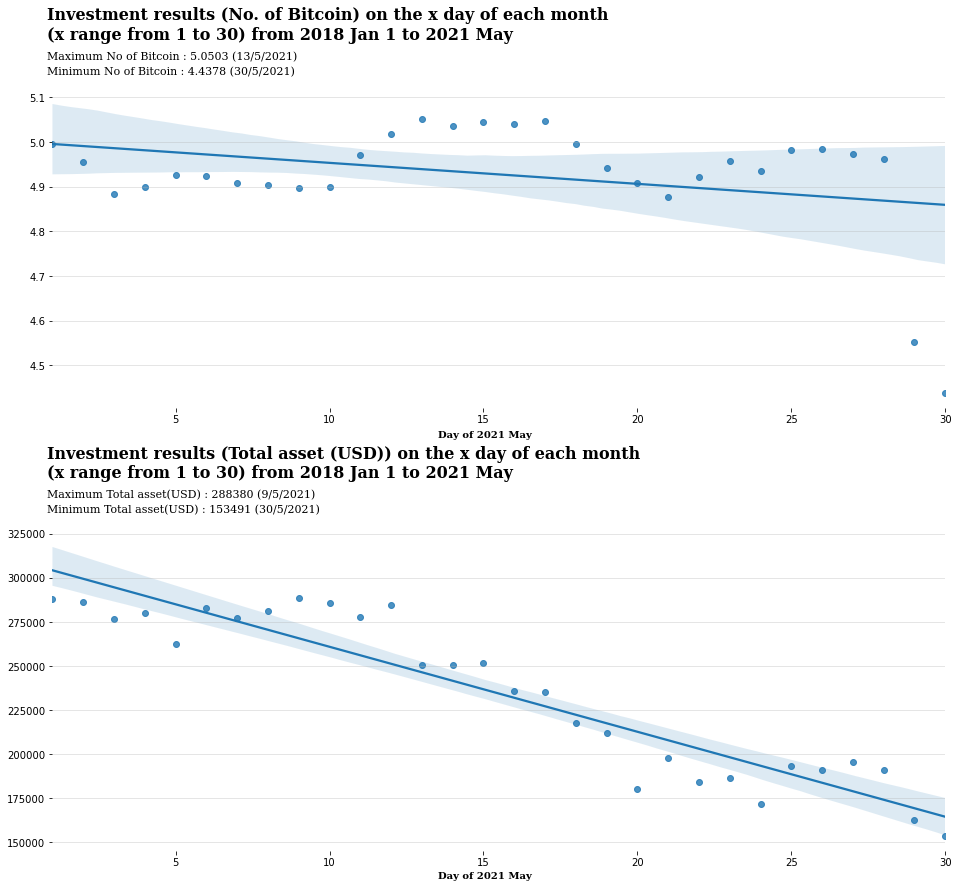

In [644]:
fig = plt.figure(figsize=(16, 14))
gs = gridspec.GridSpec(nrows = 3, ncols = 1,
                       height_ratios=[9,1,9], width_ratios=[1])

ax = plt.subplot(gs[0])
sns.regplot(x = investment_result.index, y = "btc_no", 
            data = investment_result, ax = ax)

for s in ['right', 'left', 'top', 'bottom']:
    ax.spines[s].set_visible(False)
    
ax.grid(axis = 'y', linestyle = '-', alpha = 0.4)
ax.set_xlabel("")
ax.set_ylabel("")


ax1 = plt.subplot(gs[2])
sns.regplot(x = investment_result.index, y = "asset", 
            data = investment_result, ax = ax1)

for s in ['right', 'left', 'top', 'bottom']:
    ax1.spines[s].set_visible(False)
    
ax1.grid(axis = 'y', linestyle = '-', alpha = 0.4)
ax1.set_xlabel("")
ax1.set_ylabel("")


fig.text(0.12, 0.93, '''Investment results (No. of Bitcoin) on the x day of each month 
(x range from 1 to 30) from 2018 Jan 1 to 2021 May ''', 
         fontsize = 16, fontweight = 'bold', fontfamily = 'serif')
fig.text(0.12, 0.91, F"Maximum No of Bitcoin : {max(investment_result['btc_no']):.05} (13/5/2021)",
         fontsize = 11, fontweight = 'light', fontfamily = 'serif')
fig.text(0.12, 0.895, F"Minimum No of Bitcoin : {min(investment_result['btc_no']):.05} (30/5/2021)",
         fontsize = 11, fontweight = 'light', fontfamily = 'serif')
fig.text(0.46, 0.535, "Day of 2021 May",
         fontsize = 10, fontweight = 'bold', fontfamily = 'serif')

fig.text(0.12, 0.495, '''Investment results (Total asset (USD)) on the x day of each month
(x range from 1 to 30) from 2018 Jan 1 to 2021 May ''', 
         fontsize = 16, fontweight = 'bold', fontfamily = 'serif')
fig.text(0.12, 0.475, F"Maximum Total asset(USD) : {max(investment_result['asset'])} (9/5/2021)",
         fontsize = 11, fontweight = 'light', fontfamily = 'serif')
fig.text(0.12, 0.46, F"Minimum Total asset(USD) : {min(investment_result['asset'])} (30/5/2021)",
         fontsize = 11, fontweight = 'light', fontfamily = 'serif')
fig.text(0.46, 0.097, "Day of 2021 May", 
         fontsize = 10, fontweight = 'bold', fontfamily = 'serif')

plt.show()

In [212]:
BTC_h = BTC_hourly[(14*24+1):][::-1].reset_index()  # remove the data from jun-21
BTC_h

,index,unix,date,symbol,open,high,low,close,Volume USD,Volume BTC
0,30264,1514764800,2018-01-01 00:00:00,BTCUSD,13725.000000,13825.000000,13451.000000,13579.95,3.736289e+06,275.490000
1,30263,1514768400,2018-01-01 01:00:00,BTCUSD,13579.950000,13679.950000,13250.000000,13361.02,3.431523e+06,255.530000
2,30262,1514772000,2018-01-01 02:00:00,BTCUSD,13361.020000,13497.530000,13240.000000,13338.00,2.388527e+06,179.270000
3,30261,1514775600,2018-01-01 03:00:00,BTCUSD,13338.000000,13638.000000,13270.000000,13333.33,3.224437e+06,240.830000
4,30260,1514779200,2018-01-01 04:00:00,BTCUSD,13333.330000,13633.330000,13250.000000,13578.00,2.417646e+06,180.360000
...,...,...,...,...,...,...,...,...,...,...
29923,341,1622487600000,2021-05-31 19:00:00,BTC/USD,36698.000000,36874.000000,36550.000000,36872.00,3.620043e+06,98.178646
29924,340,1622491200000,2021-05-31 20:00:00,BTC/USD,36873.000000,36980.000000,36585.000000,36686.00,3.224797e+06,87.902673
29925,339,1622494800000,2021-05-31 21:00:00,BTC/USD,36683.000000,37077.967447,36640.000000,36945.00,3.229271e+06,87.407537
29926,338,1622498400000,2021-05-31 22:00:00,BTC/USD,36924.186755,37244.000000,36850.785526,36890.00,5.294692e+06,143.526482


In [213]:
day = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
h = 0
d = 0
BTC_h["weekday"] = "test"

for row in range(len(BTC_h)):
    BTC_h["weekday"][row] = day[d]
    h += 1
    if h == 24:
        h = 0
        d += 1
        if d == 7:
            d = 0
BTC_h

<ipython-input-213-14275d14efa0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BTC_h["weekday"][row] = day[d]


,index,unix,date,symbol,open,high,low,close,Volume USD,Volume BTC,weekday
0,30264,1514764800,2018-01-01 00:00:00,BTCUSD,13725.000000,13825.000000,13451.000000,13579.95,3.736289e+06,275.490000,Monday
1,30263,1514768400,2018-01-01 01:00:00,BTCUSD,13579.950000,13679.950000,13250.000000,13361.02,3.431523e+06,255.530000,Monday
2,30262,1514772000,2018-01-01 02:00:00,BTCUSD,13361.020000,13497.530000,13240.000000,13338.00,2.388527e+06,179.270000,Monday
3,30261,1514775600,2018-01-01 03:00:00,BTCUSD,13338.000000,13638.000000,13270.000000,13333.33,3.224437e+06,240.830000,Monday
4,30260,1514779200,2018-01-01 04:00:00,BTCUSD,13333.330000,13633.330000,13250.000000,13578.00,2.417646e+06,180.360000,Monday
...,...,...,...,...,...,...,...,...,...,...,...
29923,341,1622487600000,2021-05-31 19:00:00,BTC/USD,36698.000000,36874.000000,36550.000000,36872.00,3.620043e+06,98.178646,Monday
29924,340,1622491200000,2021-05-31 20:00:00,BTC/USD,36873.000000,36980.000000,36585.000000,36686.00,3.224797e+06,87.902673,Monday
29925,339,1622494800000,2021-05-31 21:00:00,BTC/USD,36683.000000,37077.967447,36640.000000,36945.00,3.229271e+06,87.407537,Monday
29926,338,1622498400000,2021-05-31 22:00:00,BTC/USD,36924.186755,37244.000000,36850.785526,36890.00,5.294692e+06,143.526482,Monday


In [233]:
BTC_h['date'][0][-8:-6]

'00'

In [237]:
buy_index = []
sell_index = []

for i in range(len(BTC_h)):
    if (BTC_h['date'][i][-8:-6] == "01") and (BTC_h['weekday'][i] == "Sunday"):  # hour
        buy_index.append(i)
    if BTC_h['date'][i][-8:-6] == "07" and BTC_h['weekday'][i] == "Friday":
        sell_index.append(i)


In [331]:
buy = BTC_h.iloc[buy_index][['date','open','weekday']].reset_index(drop = True)
buy

,date,open,weekday
0,2018-01-07 01:00:00,17007.190000,Sunday
1,2018-01-14 01:00:00,14259.000000,Sunday
2,2018-01-21 01:00:00,12306.000000,Sunday
3,2018-01-28 01:00:00,11555.000000,Sunday
4,2018-02-04 01:00:00,9057.000000,Sunday
...,...,...,...
173,2021-05-02 01:00:00,57413.000000,Sunday
174,2021-05-09 01:00:00,58539.189297,Sunday
175,2021-05-16 01:00:00,47390.000000,Sunday
176,2021-05-23 01:00:00,38284.126405,Sunday


In [332]:
sell = BTC_h.iloc[sell_index][['date','open','weekday']].reset_index(drop = True)
sell

,date,open,weekday
0,2018-01-05 07:00:00,14999.000000,Friday
1,2018-01-12 07:00:00,13800.000000,Friday
2,2018-01-19 07:00:00,11260.000000,Friday
3,2018-01-26 07:00:00,11395.850000,Friday
4,2018-02-02 07:00:00,8725.000000,Friday
...,...,...,...
173,2021-04-30 07:00:00,54444.000000,Friday
174,2021-05-07 07:00:00,56142.000000,Friday
175,2021-05-14 07:00:00,49123.000000,Friday
176,2021-05-21 07:00:00,40638.212828,Friday


# Answer of 1 (b) (i)

In [303]:
st = (buy['open'] < sell['open']).sum()/(buy['open'] < sell['open']).count()
print(f"Success rate of the claim {st:0.03}%")

Success rate of the claim 0.371%


In [335]:
buy['date'] = buy['date'].apply(lambda row : row[:10])
buy['date'] = pd.to_datetime(buy.date, format='%Y-%m-%d')

sell['date'] = sell['date'].apply(lambda row : row[:10])
sell['date'] = pd.to_datetime(sell.date, format='%Y-%m-%d')

In [336]:
buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     178 non-null    datetime64[ns]
 1   open     178 non-null    float64       
 2   weekday  178 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 4.3+ KB


Text(0.84, 0.91, 'sell')

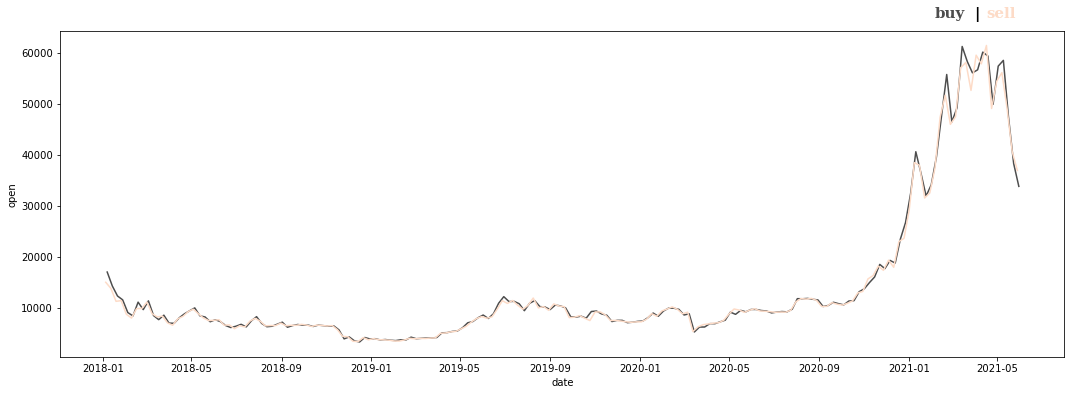

In [356]:
fig, ax = plt.subplots(1, 1, figsize = (18,6))

sns.lineplot(x = 'date', y = 'open', data = buy, ax = ax, color = "#4d4d4d")
sns.lineplot(x = 'date', y = 'open', data = sell, ax = ax, color = "#fddbc7")

fig.text(0.80,0.91,"buy", color = "#4d4d4d",
         fontweight = "bold",fontfamily = 'serif', fontsize = 15)
fig.text(0.83,0.91,"|", color = 'black',
         fontweight = "bold",fontfamily = 'serif', fontsize = 15)
fig.text(0.84,0.91,"sell",color = "#fddbc7",
         fontweight = "bold",fontfamily = 'serif', fontsize = 15)

In [366]:
usd = 10000
history = {}
for i in range(len(buy)):
    no_of_btc = usd / buy['open'][i]
    usd = no_of_btc * sell['open'][i]
    history[sell['date'][i]] = usd
    
client_asset = pd.DataFrame(history , index = ["USD"]).T
client_asset

,USD
2018-01-05,8819.211169
2018-01-12,8535.319036
2018-01-19,7809.823854
2018-01-26,7702.257132
2018-02-02,7419.917575
...,...
2021-04-30,1355.763141
2021-05-07,1300.244420
2021-05-14,1347.792924
2021-05-21,1430.668552


# Answer of 1 (b) (ii)

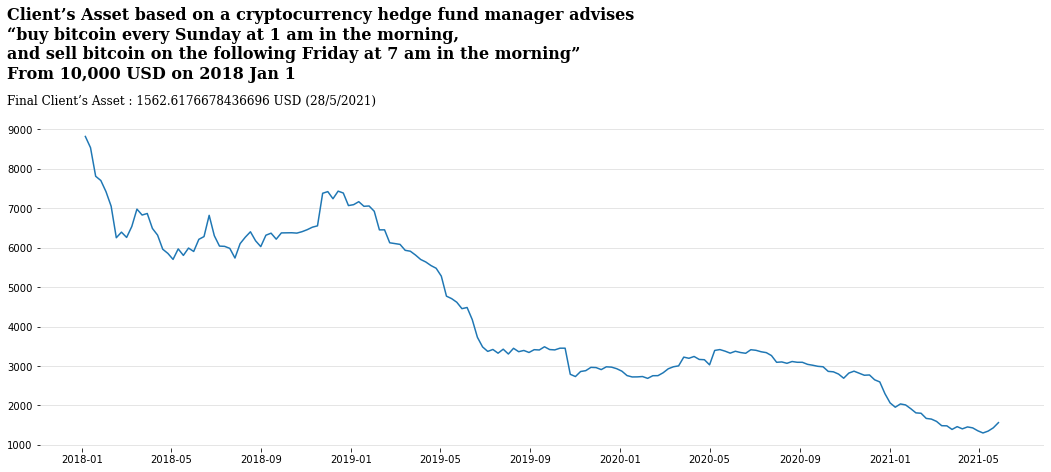

In [648]:
fig, ax = plt.subplots(1, 1, figsize = (18,6))

sns.lineplot(x = client_asset.index, 
             y = 'USD',
             data = client_asset)

for s in ['right', 'left', 'top', 'bottom']:
    ax.spines[s].set_visible(False)
    
ax.grid(axis = 'y', linestyle = '-', alpha = 0.4)
ax.set_xlabel("")
ax.set_ylabel("")

fig.text(0.1, 0.98, '''Client’s Asset based on a cryptocurrency hedge fund manager advises
“buy bitcoin every Sunday at 1 am in the morning,
and sell bitcoin on the following Friday at 7 am in the morning”
From 10,000 USD on 2018 Jan 1''', 
         fontsize = 16, fontweight = 'bold', fontfamily = 'serif')
fig.text(0.1, 0.92, F"Final Client’s Asset : {client_asset['USD'][len(client_asset)-1]} USD (28/5/2021)",
         fontsize = 12, fontweight = 'light', fontfamily = 'serif')

plt.show()

In [252]:
BTC_daily

,index,unix,date,symbol,open,high,low,close,Volume USD,Volume BTC
0,30264,1514764800,2018-01-01 00:00:00,BTCUSD,13725.000000,13825.000000,13451.000000,13579.950000,3.736289e+06,275.490000
1,30240,1514851200,2018-01-02 00:00:00,BTCUSD,13369.820000,13928.630000,13369.820000,13804.880000,3.311798e+06,240.450000
2,30216,1514937600,2018-01-03 00:00:00,BTCUSD,14704.250000,14950.000000,14700.000000,14775.130000,2.143302e+06,144.450000
3,30192,1515024000,2018-01-04 00:00:00,BTCUSD,15100.000000,15176.060000,14939.000000,15100.000000,7.481281e+06,498.140000
4,30168,1515110400,2018-01-05 00:00:00,BTCUSD,15199.000000,15199.000000,14903.460000,14999.100000,3.489501e+06,232.820000
...,...,...,...,...,...,...,...,...,...,...
1242,456,1622073600000,2021-05-27 00:00:00,BTC/USD,39303.000000,39322.397576,38445.000000,38676.423101,7.316671e+06,189.176519
1243,432,1622160000000,2021-05-28 00:00:00,BTC/USD,38537.036179,38889.000000,37990.000000,38025.000000,8.305154e+06,218.412995
1244,408,1622246400000,2021-05-29 00:00:00,BTC/USD,35660.870528,36424.000000,35649.795836,36238.000000,1.035265e+07,285.684968
1245,384,1622332800000,2021-05-30 00:00:00,BTC/USD,34587.398084,34588.000000,33367.000000,33839.000000,1.988966e+07,587.773146


In [255]:
BTC_daily['date'][1][-11:-9] # day

'02'

In [284]:
monthly_index = []
two_months_index = []
quarter_index = []
year_index = []

m = 0
for i in range(len(BTC_daily)):
    if BTC_daily['date'][i][-11:-9] == "01":  # day
        monthly_index.append(i)
        if m%2 == 0:
            two_months_index.append(i)
        m += 1

m = 0
for i in range(len(BTC_daily)):
    if BTC_daily['date'][i][-11:-9] == "01":       
        if m%3 == 0:
            quarter_index.append(i)
        m += 1

m = 0
for i in range(len(BTC_daily)):
    if BTC_daily['date'][i][-11:-9] == "01":
        if m%12 == 0:
                    year_index.append(i)
        m += 1
    

print(monthly_index)    
print(two_months_index)
print(quarter_index)
print(year_index)       

[0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 365, 396, 424, 455, 485, 516, 546, 577, 608, 638, 669, 699, 730, 761, 790, 821, 851, 882, 912, 943, 974, 1004, 1035, 1065, 1096, 1127, 1155, 1186, 1216]
[0, 59, 120, 181, 243, 304, 365, 424, 485, 546, 608, 669, 730, 790, 851, 912, 974, 1035, 1096, 1155, 1216]
[0, 90, 181, 273, 365, 455, 546, 638, 730, 821, 912, 1004, 1096, 1186]
[0, 365, 730, 1096]


In [434]:
month = BTC_daily.iloc[monthly_index][['date', 'open']].reset_index(drop = True)
month.head(3)

,date,open
0,2018-01-01 00:00:00,13725.00
1,2018-02-01 00:00:00,10256.00
2,2018-03-01 00:00:00,10293.91


In [435]:
two_months = BTC_daily.iloc[two_months_index][['date', 'open']].reset_index(drop = True)
two_months.head(3)

,date,open
0,2018-01-01 00:00:00,13725.00
1,2018-03-01 00:00:00,10293.91
2,2018-05-01 00:00:00,9235.00


In [436]:
quarter = BTC_daily.iloc[quarter_index][['date', 'open']].reset_index(drop = True)
quarter.head(3)

,date,open
0,2018-01-01 00:00:00,13725.0
1,2018-04-01 00:00:00,6911.0
2,2018-07-01 00:00:00,6391.5


In [437]:
year = BTC_daily.iloc[year_index][['date', 'open']].reset_index(drop = True)
year

,date,open
0,2018-01-01 00:00:00,13725.00
1,2019-01-01 00:00:00,3830.50
2,2020-01-01 01:00:00,7189.81
3,2021-01-01 00:00:00,28939.00


In [606]:
usd = 10000
usd_for_btc = 0.5 * usd

def rebalance(freq):    # setup a function for re-balances the portfolio

    no_of_btc = usd_for_btc / month['open'][0]
    cash = 0.5 * usd
    portfolio_freq = {freq['date'][0] : usd}
    
    for i in range(1,len(freq)):
        cash = (no_of_btc * freq['open'][i] + cash) / 2
        no_of_btc = cash / freq['open'][i] * 0.9  # re-balance fee 0.1% for btc
        cash *= 0.9  # re-balance fee 0.1% for cash
        portfolio_freq[freq['date'][i]] = cash * 2 
    return portfolio_freq  # return dict

         


In [607]:
df_month = pd.DataFrame(rebalance(month) , index = ["USD"]).T
df_two_months = pd.DataFrame(rebalance(two_months) , index = ["USD"]).T
df_quarter = pd.DataFrame(rebalance(quarter) , index = ["USD"]).T
df_year = pd.DataFrame(rebalance(year) , index = ["USD"]).T

df_quarter

,USD
2018-01-01 00:00:00,10000.000000
2018-04-01 00:00:00,6765.901639
2018-07-01 00:00:00,5860.444646
2018-10-01 00:00:00,5369.671949
2019-01-01 00:00:00,3814.008481
2019-04-01 00:00:00,3583.604731
2019-07-01 01:00:00,5883.019655
2019-10-01 01:00:00,4625.563312
2020-01-01 01:00:00,3896.287290
2020-04-01 01:00:00,3297.226501


In [609]:
df_year

,USD
2018-01-01 00:00:00,10000.000000
2019-01-01 00:00:00,5755.901639
2020-01-01 01:00:00,7451.852024
2021-01-01 00:00:00,16850.507269


# Answer of 2

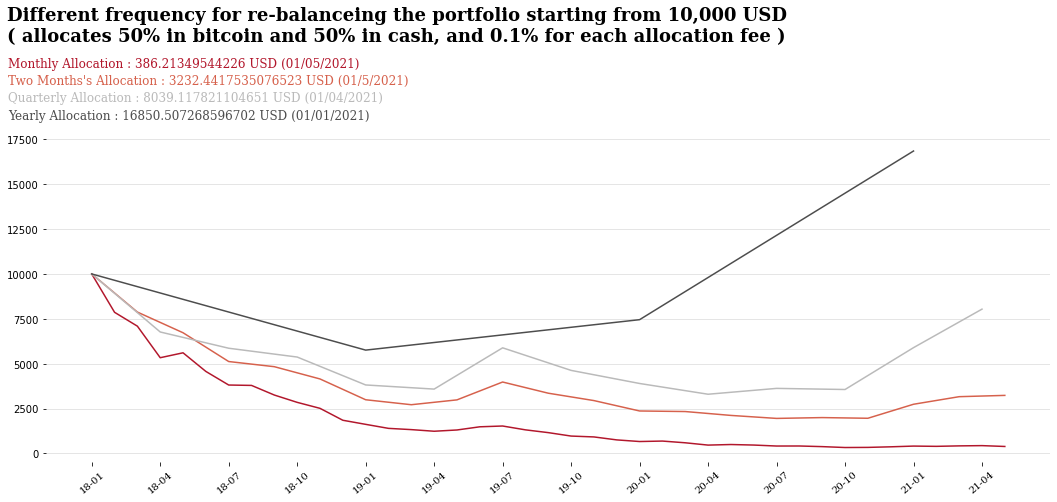

In [632]:
fig, ax = plt.subplots(1, 1, figsize = (18,6))

sns.lineplot(x = df_month.index, y = 'USD', data = df_month, ax = ax, color = "#b2172c")
sns.lineplot(x = df_two_months.index, y = 'USD', data = df_two_months, ax = ax, color = "#d6614c")
sns.lineplot(x = df_quarter.index, y = 'USD', data = df_quarter, ax = ax, color = "#bababa")
sns.lineplot(x = df_year.index, y = 'USD', data = df_year, ax = ax, color = "#4d4d4d")

ax.set_xticks(df_quarter.index)
ax.set_xticklabels(labels = df_quarter.reset_index()['index'].apply(lambda x : x[2:7]),
                   rotation = 40, fontweight = 'light', fontfamily = 'serif')

for s in ['right', 'left', 'top', 'bottom']:
    ax.spines[s].set_visible(False)
    
ax.grid(axis = 'y', linestyle = '-', alpha = 0.4)
ax.set_xlabel("")
ax.set_ylabel("")

fig.text(0.095, 1.1, '''Different frequency for re-balanceing the portfolio starting from 10,000 USD
( allocates 50% in bitcoin and 50% in cash, and 0.1% for each allocation fee ) ''', 
         fontsize = 18, fontweight = 'bold', fontfamily = 'serif')
fig.text(0.096, 1.04, F"Monthly Allocation : {df_month['USD'][len(df_month)-1]} USD (01/05/2021)",
         fontsize = 12, fontweight = 'light', fontfamily = 'serif', color = "#b2172c")
fig.text(0.096, 1.0, F"Two Months's Allocation : {df_two_months['USD'][len(df_two_months)-1]} USD (01/5/2021)",
         fontsize = 12, fontweight = 'light', fontfamily = 'serif', color = "#d6614c")
fig.text(0.096, 0.96, F"Quarterly Allocation : {df_quarter['USD'][len(df_quarter)-1]} USD (01/04/2021)",
         fontsize = 12, fontweight = 'light', fontfamily = 'serif', color = "#bababa")
fig.text(0.096, 0.92, F"Yearly Allocation : {df_year['USD'][len(df_year)-1]} USD (01/01/2021)",
         fontsize = 12, fontweight = 'light', fontfamily = 'serif', color = "#4d4d4d")



plt.show()